En este archivo puedes escribir lo que estimes conveniente. Te recomendamos detallar tu solución y todas las suposiciones que estás considerando. Aquí puedes ejecutar las funciones que definiste en los otros archivos de la carpeta src, medir el tiempo, memoria, etc.

# Entorno

Las siguientes métricas de tiempos y memoria se calcularon en una MacBook Pro M1 de 16 GB de RAM, con Sonoma 14.5.

In [1]:
from memory_profiler import memory_usage
file_path = "../data/farmers-protest-tweets-2021-2-4.json"

def time_profile_function_wrapper(func):
    import cProfile
    import pstats
    import io
    import os
    import sys

    def wrapper(*args, **kwargs):
        pr = cProfile.Profile()
        pr.enable()
        result = func(*args, **kwargs)
        pr.disable()
        s = io.StringIO()
        ps = pstats.Stats(pr, stream=s).sort_stats('cumulative')
        ps.print_stats()
        print(s.getvalue())
        return result

    return wrapper


In [18]:
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


# Aclaración sobre Git Flow y branches

Para la primera pregunta se crearon dos feature branches "q1_time" y "q1_memory". Se hizo merge de ambas a "develop" usando el comando "git flow feature finish q1_memory --keep q1_memory". Sin embargo, las branches se borraban automáticamente. En las siguientes preguntas se usará un approach distinto donde se publicarán primero las feature branches y luego se creará un PR en Github para ahí sí, hacer el merge. De esta forma las branches quedan publicadas y se hace un PR antes del merge.

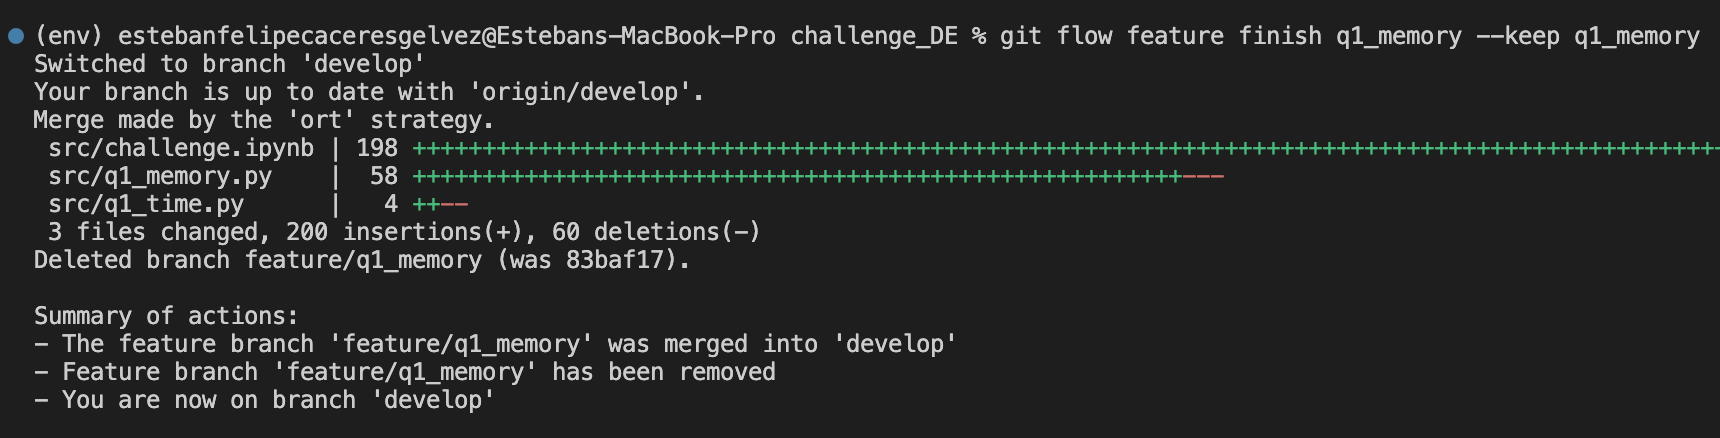

# Primera pregunta

Se probaron varias opciones para hacer esta pregunta. Primero, usar Pandas para, con un dataframe, calcular las métricas usando métodos como nlargest y groupby. Sin embargo, eran un poco más lentos que usando métodos nativos de Python. Además, el importar la librería de Pandas también incrementa la memoria.

También, algo que veremos en todos los problemas, es la optimización que ocurre al usar la librería orjson en vez de json. El speedup es impresionante, y hace que por ejemplo este primer problema se ejecute en 1.2 segundos, en promedio. Sin embargo, la librería orjson utiliza un poco más de memoria que la librería por defecto.

Por otro lado, añadir try/except añade al menos 0.1 sgs de más en promedio, pero es necesario, ya que el código debe ser robusto a posibles errores en el JSON.

Así mismo, se podrían unificar las funciones de lectura del JSON ya que son muy parecidas, sin embargo esto haría que el código de optimización de memoria importara librerías que no necesita, lo que aumentaría el uso de memoria.

En términos de optimización en memoria lo único que se puede hacer es usar JSON en vez de ORJSON, ya que usa menos memoria. Pero el código optimizado para tiempo en gran parte también está optimizado para usar la menor cantidad de memoria posible.

Supuestos:
- La estructura de los archivos se mantiene a lo largo de las líneas.
- La estructura de las fechas es siempre la misma a lo largo de las líneas.

## Tiempo

In [2]:
from q1_time import q1_time

Resultados:

In [5]:
q1_time(file_path)

[(datetime.date(2021, 2, 12), 'RanbirS00614606'),
 (datetime.date(2021, 2, 13), 'MaanDee08215437'),
 (datetime.date(2021, 2, 17), 'RaaJVinderkaur'),
 (datetime.date(2021, 2, 16), 'jot__b'),
 (datetime.date(2021, 2, 14), 'rebelpacifist'),
 (datetime.date(2021, 2, 18), 'neetuanjle_nitu'),
 (datetime.date(2021, 2, 15), 'jot__b'),
 (datetime.date(2021, 2, 20), 'MangalJ23056160'),
 (datetime.date(2021, 2, 23), 'Surrypuria'),
 (datetime.date(2021, 2, 19), 'Preetm91')]

Tiempo promedio que se demora en correr la función:

In [6]:
%%timeit
q1_time(file_path)

1.32 s ± 467 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Se demora 1.32 sgs cada ejecución.

Detalles:

In [13]:
time_profile_function_wrapper(q1_time)(file_path)

         1090571 function calls in 1.312 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.084    0.084    1.312    1.312 /Users/estebanfelipecaceresgelvez/Downloads/challenge_DE/src/q1_time.py:30(q1_time)
   117408    0.505    0.000    1.211    0.000 /Users/estebanfelipecaceresgelvez/Downloads/challenge_DE/src/q1_time.py:6(read_json_q1_memory)
   117407    0.633    0.000    0.633    0.000 {orjson.loads}
    49772    0.016    0.000    0.043    0.000 /Users/estebanfelipecaceresgelvez/.pyenv/versions/3.10.8/lib/python3.10/codecs.py:319(decode)
    49772    0.027    0.000    0.027    0.000 {built-in method _codecs.utf_8_decode}
   352221    0.016    0.000    0.016    0.000 {method 'get' of 'dict' objects}
   117407    0.012    0.000    0.012    0.000 {method 'split' of 'str' objects}
   117407    0.007    0.000    0.007    0.000 {built-in method fromisoformat}
   117407    0.006    0.000    0.006    0.000 {metho

[(datetime.date(2021, 2, 12), 'RanbirS00614606'),
 (datetime.date(2021, 2, 13), 'MaanDee08215437'),
 (datetime.date(2021, 2, 17), 'RaaJVinderkaur'),
 (datetime.date(2021, 2, 16), 'jot__b'),
 (datetime.date(2021, 2, 14), 'rebelpacifist'),
 (datetime.date(2021, 2, 18), 'neetuanjle_nitu'),
 (datetime.date(2021, 2, 15), 'jot__b'),
 (datetime.date(2021, 2, 20), 'MangalJ23056160'),
 (datetime.date(2021, 2, 23), 'Surrypuria'),
 (datetime.date(2021, 2, 19), 'Preetm91')]

## Memoria

In [1]:
from q1_memory import q1_memory

Resultados

In [6]:
mem_usage = memory_usage((q1_memory, (file_path,)))
print("Máxima memoria usada: %d" % max(mem_usage), "MB")

Filename: /Users/estebanfelipecaceresgelvez/Downloads/challenge_DE/src/q1_memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    32     33.8 MiB     33.8 MiB           1   @profile
    33                                         def q1_memory(file_path: str) -> List[Tuple[date, str]]:
    34                                             """
    35                                             Función que retorna los 10 días con más tweets y el usuario que más tweets hizo en cada uno de esos días.
    36                                             
    37                                             :param file_path: str con la ruta del archivo JSON.
    38                                             :return top_users_per_date: Lista de tuplas con la fecha y el usuario con más tweets en esa fecha.
    39                                             """
    40                                             
    41                                             # Creamos un dicci

Podría concluirse que el uso de memoria máximo estuvo en 37.9 MB. Al inicio el programa tenía 33.8 MB, por lo que el programa requirió un máximo 4.1 MB adicionales para su ejecución.

# Problema 2

Para este problema de detectar los emojis primero se probaron diferentes formas de detectar emojis. La primera fue usando la librería "emoji" y evaluando si cada char de cada tuit estaba en emoji.EMOJI_DATA. Sin embargo, este método no detecta todos los pictographics (algunos sí y otros no). Por esto, se usó entonces un patrón de regex que sí detecta de forma más completa tanto emojis como los pictographics.

Otro principio de buena práctica que se usó fue siempre, al extraer algún key del diccionario del tuit, usar el método .get, para -en caso de que no exista- devolver un null y no un error.

En términos de optimización de memoria se evita la creación de variables no necesarias y se usa el built-in library de Python para leer el json (y no orjson) ya que como vimos, require un poco más de memoria.

Como se mencionó anteriormente, para este problema y para el problema 3 se dejan en el repositorio de Github las ramas originales del feature y se hace un PR al hacer el merge a develop.

Supuestos:
- Los pictographics están incluidos como emojis.
- La estructura de los archivos se mantiene a lo largo de las líneas.
- La estructura de las fechas es siempre la misma a lo largo de las líneas.
- Si el mismo emoji aparece 2 veces en un tuit, se añaden 2 cuentas al total de cuentas de ese emoji.

# Tiempo

In [1]:
from q2_time import q2_time

Resultados

In [4]:
q2_time(file_path)

[('🙏', 7286),
 ('😂', 3072),
 ('🚜', 2972),
 ('✊', 2411),
 ('🌾', 2363),
 ('🇮', 2096),
 ('🇳', 2094),
 ('🏻', 2080),
 ('❤', 1779),
 ('🤣', 1668)]

Tiempo promedio que se demora en correr la función:

In [5]:
%%timeit
q2_time(file_path)

1.26 s ± 23.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Se demora 1.26 sgs cada ejecución.

Detalles:

In [6]:
time_profile_function_wrapper(q2_time)(file_path)

         1174093 function calls in 1.446 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.043    0.043    1.446    1.446 /Users/estebanfelipecaceresgelvez/Downloads/challenge_DE/src/q2_time.py:29(q2_time)
   117408    0.403    0.000    1.049    0.000 /Users/estebanfelipecaceresgelvez/Downloads/challenge_DE/src/q2_time.py:12(read_json_q2_time)
   117407    0.639    0.000    0.639    0.000 {orjson.loads}
   117407    0.016    0.000    0.268    0.000 /Users/estebanfelipecaceresgelvez/Downloads/challenge_DE/src/q2_time.py:26(get_emojis_from_tweet)
   117407    0.252    0.000    0.252    0.000 {method 'findall' of '_regex.Pattern' objects}
   117408    0.028    0.000    0.086    0.000 /Users/estebanfelipecaceresgelvez/.pyenv/versions/3.10.8/lib/python3.10/collections/__init__.py:640(update)
   117407    0.018    0.000    0.042    0.000 {built-in method builtins.isinstance}
   117407    0.012    0.000    0.024    

[('🙏', 7286),
 ('😂', 3072),
 ('🚜', 2972),
 ('✊', 2411),
 ('🌾', 2363),
 ('🇮', 2096),
 ('🇳', 2094),
 ('🏻', 2080),
 ('❤', 1779),
 ('🤣', 1668)]

# Memoria

In [2]:
from q2_memory import q2_memory

Resultados

In [6]:
mem_usage = memory_usage((q2_memory, (file_path,)))
print("Máxima memoria usada: %d" % max(mem_usage), "MB")

Filename: /Users/estebanfelipecaceresgelvez/Downloads/challenge_DE/src/q2_memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    40     30.8 MiB     30.8 MiB           1   @profile
    41                                         def q2_memory(file_path: str) -> List[Tuple[str, int]]:
    42                                         
    43                                             """
    44                                             Función que retorna los 10 emojis más usados en los tweets.
    45                                         
    46                                             :param file_path: str con la ruta del archivo JSON.
    47                                             :return top_10_emojis: Lista de tuplas con el emoji y la cantidad de veces que aparece.
    48                                             """
    49                                         
    50                                             # Se inicializa un contador de emoji

El pico de memoria estuvo en los 32 MB. El inicial estuvo en 30.8 MB, por lo que el programa después de iniciado necesitó 1.2 MB.

# Problema 3